# Snap Finance's Assessment for Business Intelligence Engineer I

#### Parvathy Biju Pillai | parvathybijupillai@gmail.com | June 8, 2025

"""

About the dataset:


The sample_datasets.xlsx dataset provides insights into customer financing, store partnerships, and 
marketing campaigns. It includes 4 tables:

1) Customers: 

   - 222 rows
   - Details on customers (ages 16–31, incomes $1,056–$14,922, languages English/Spanish/French) 
     linked to marketing campaigns. 
   - Use: Understand customer demographics and campaign reach.
   
2) Applications: 
   - 65,535 rows 
   - Tracks financing applications (2022–2023) with approval status, amounts ($1,255–$4,941), 
     dollars used ($0–$2,924), and risk grades (A–F). 
   - Use: Analyze approval rates and spending trends.

3) Stores: 
   - 250 rows 
   - Describes partner stores (started 2020–2021, across U.S. states, 
     sizes Small/Medium/Enterprise, industries like Retail/Healthcare). 
   - Use: Evaluate store performance by size or industry.

4) Marketing: 
   - 16 rows
   - Lists campaigns (e.g., Google Ads, spend $0–$4.8M, running 2022–2033). 
   - Use: Assess campaign ROI via customer spending.


Key Value: 

The dataset links customers, applications, stores, and campaigns to reveal which customer segments,
store types, and marketing efforts drive approvals and spending, helping optimize financing strategies 
and partnerships. Note: The applications data may be incomplete; a full dataset ensures accurate insights.


"""

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
# Load the Excel file
file_path = '/Users/parvathypillai/Desktop/SnapFinance/Assessment/sample_datasets.xlsx'
customers = pd.read_excel(file_path, sheet_name='customers')
applications = pd.read_excel(file_path, sheet_name='applications')
stores = pd.read_excel(file_path, sheet_name='stores')
marketing = pd.read_excel(file_path, sheet_name='marketing')

# Convert date columns to datetime
applications['submit_date'] = pd.to_datetime(applications['submit_date'])
applications['approved_date'] = pd.to_datetime(applications['approved_date'])

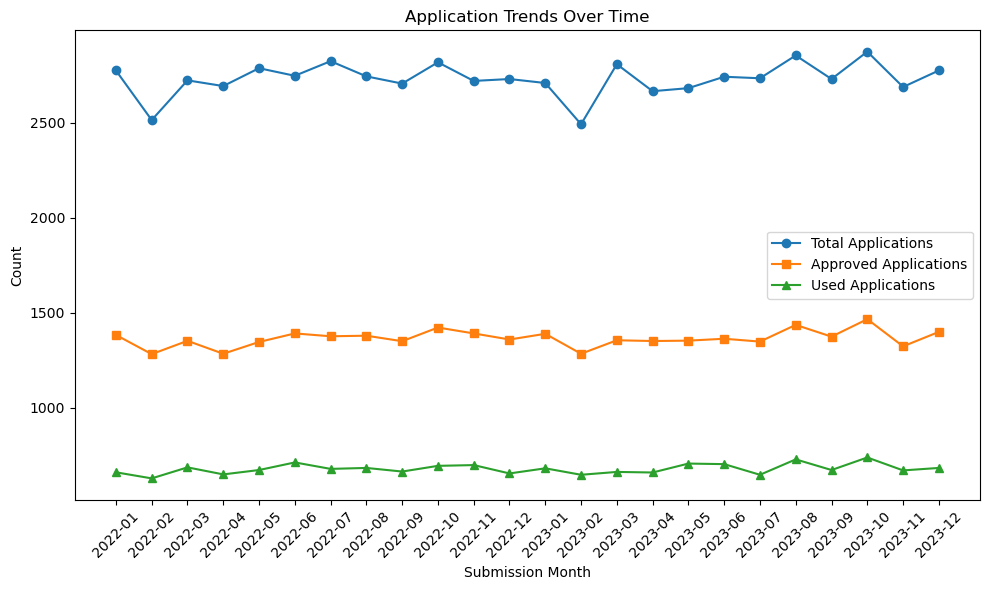

In [3]:
"""

Task 1

Calculate the number of applications, number of approved, and the number of used applications
and visualize the trend over the submission date.


"""


# Aggregate by submission date (monthly for smoother trends)
applications['submit_month'] = applications['submit_date'].dt.to_period('M')
app_counts = applications.groupby('submit_month').agg(
    total_applications=('application_id', 'count'),
    approved_applications=('approved', 'sum'),
    used_applications=('dollars_used', lambda x: (x > 0).sum())
).reset_index()

# Convert submit_month to string for plotting
app_counts['submit_month'] = app_counts['submit_month'].astype(str)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(app_counts['submit_month'], app_counts['total_applications'], label='Total Applications', marker='o')
plt.plot(app_counts['submit_month'], app_counts['approved_applications'], label='Approved Applications', marker='s')
plt.plot(app_counts['submit_month'], app_counts['used_applications'], label='Used Applications', marker='^')
plt.title('Application Trends Over Time')
plt.xlabel('Submission Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()



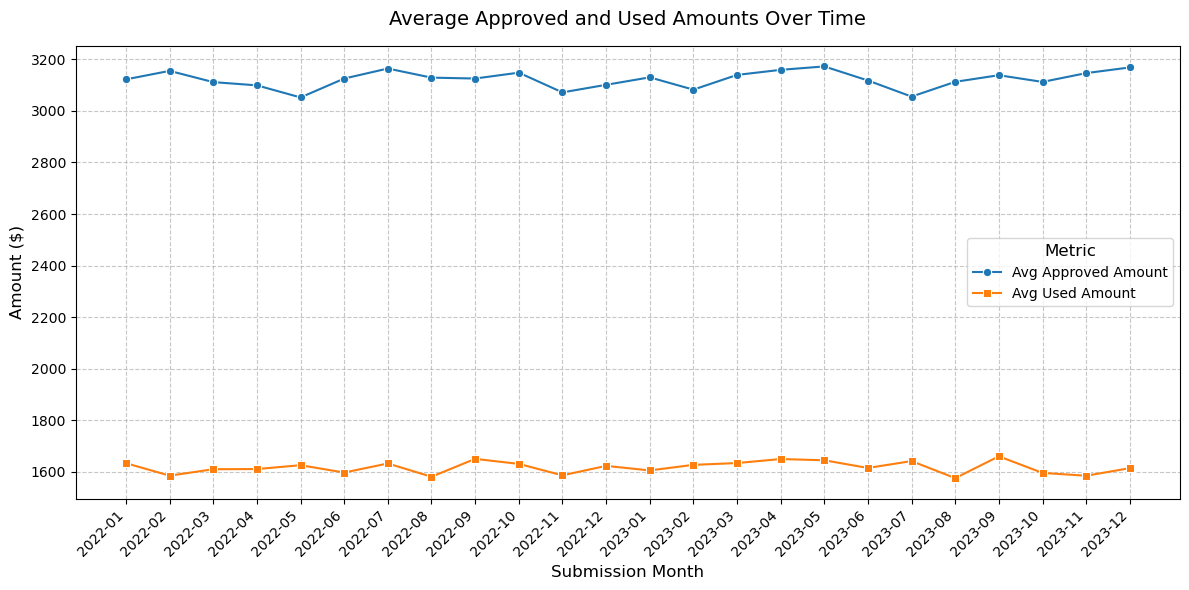

   submit_month  avg_approved_amount  avg_used_amount
0       2022-01          3122.247289      1633.737879
1       2022-02          3155.090484      1585.361465
2       2022-03          3111.555473      1610.338192
3       2022-04          3098.978193      1610.996918
4       2022-05          3052.092868      1625.928571
5       2022-06          3125.365205      1597.436798
6       2022-07          3164.232558      1632.600295
7       2022-08          3128.906454      1581.159590
8       2022-09          3125.450370      1650.415663
9       2022-10          3148.229255      1631.048991
10      2022-11          3071.715313      1586.580229
11      2022-12          3101.031641      1623.287462
12      2023-01          3130.035277      1605.668135
13      2023-02          3082.333333      1627.255023
14      2023-03          3139.433948      1634.280967
15      2023-04          3159.116950      1649.836115
16      2023-05          3172.413156      1645.024079
17      2023-06          311

In [4]:
""" 

Task 2

Calculate the average of the approved amount and the average of the amount used and visualize the trend over 
the submission date.Calculate average approved amount and average dollars used per submission date


"""



# Aggregate by submission date (monthly for smoother trends)
applications['submit_month'] = applications['submit_date'].dt.to_period('M')
avg_amounts = applications.groupby('submit_month').agg(
    avg_approved_amount=('approved_amount', 'mean'),
    avg_used_amount=('dollars_used', 'mean')
).reset_index()

# Convert submit_month to string for plotting
avg_amounts['submit_month'] = avg_amounts['submit_month'].astype(str)

# Plot line chart
plt.figure(figsize=(12, 6))
sns.lineplot(data=avg_amounts, x='submit_month', y='avg_approved_amount', label='Avg Approved Amount', marker='o', color='#1f77b4')
sns.lineplot(data=avg_amounts, x='submit_month', y='avg_used_amount', label='Avg Used Amount', marker='s', color='#ff7f0e')
plt.title('Average Approved and Used Amounts Over Time', fontsize=14, pad=15)
plt.xlabel('Submission Month', fontsize=12)
plt.ylabel('Amount ($)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Metric', fontsize=10, title_fontsize=12)
plt.tight_layout()
plt.show()

# Print summary table for reference
print(avg_amounts[['submit_month', 'avg_approved_amount', 'avg_used_amount']])
plt.show()

# This helps identify spending patterns and utilization trends post-approval.

In [5]:
"""

Task 3

Create a table to show possible metrics (e.g. number of applications, number of approved, 
approved amount, number of used apps, used amount, percentages, etc) by store.


"""


# Merge applications with stores
app_store = applications.merge(stores, on='store', how='left')

# Calculate metrics by store
store_metrics = app_store.groupby('store').agg(
    total_applications=('application_id', 'count'),
    approved_applications=('approved', 'sum'),
    approved_amount=('approved_amount', 'sum'),
    used_applications=('dollars_used', lambda x: (x > 0).sum()),
    used_amount=('dollars_used', 'sum'),
    approval_rate=('approved', 'mean'),
    usage_rate=('dollars_used', lambda x: (x > 0).sum() / x.count())
).reset_index()

# Format percentages
store_metrics['approval_rate'] = (store_metrics['approval_rate'] * 100).round(2)
store_metrics['usage_rate'] = (store_metrics['usage_rate'] * 100).round(2)

# Display table
print(store_metrics)

store_metrics.head()

         store  total_applications  approved_applications  approved_amount  \
0      store_0                 284                    146         448420.0   
1      store_1                 277                    136         431736.0   
2     store_10                 253                    128         388397.0   
3    store_100                 257                    134         431148.0   
4    store_101                 257                    130         405727.0   
..         ...                 ...                    ...              ...   
245   store_95                 277                    141         441915.0   
246   store_96                 282                    137         433136.0   
247   store_97                 240                    114         361735.0   
248   store_98                 260                    114         357341.0   
249   store_99                 263                    134         446737.0   

     used_applications  used_amount  approval_rate  usage_rate 

,store,total_applications,approved_applications,approved_amount,used_applications,used_amount,approval_rate,usage_rate
0,store_0,284,146,448420.0,69,107970.0,51.41,100.0
1,store_1,277,136,431736.0,70,114715.0,49.10,100.0
2,store_10,253,128,388397.0,60,94609.0,50.59,100.0
3,store_100,257,134,431148.0,63,100645.0,52.14,100.0
4,store_101,257,130,405727.0,63,107608.0,50.58,100.0


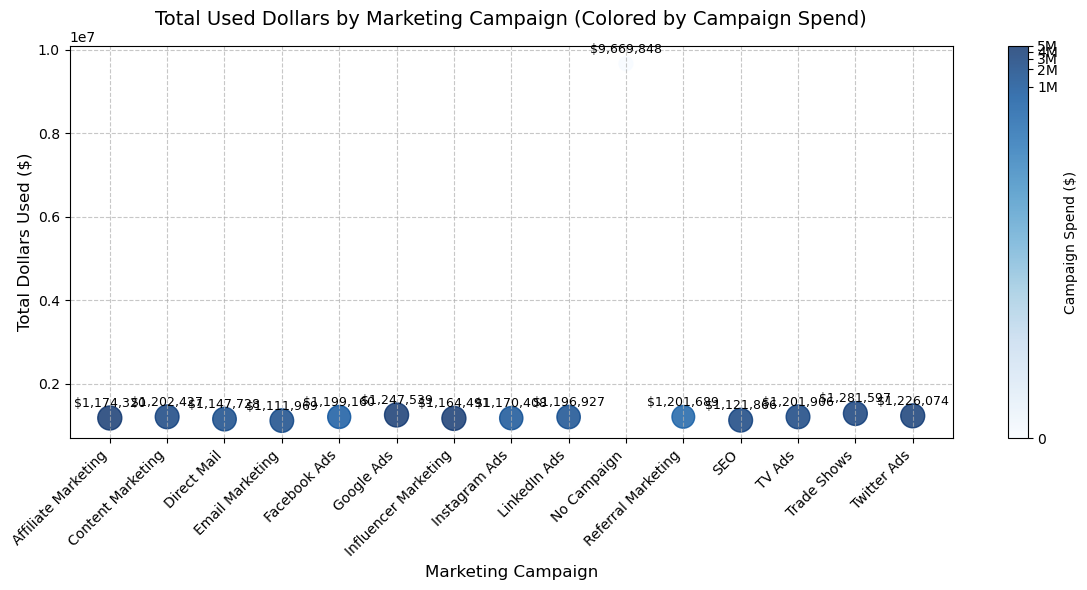

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the Excel file
file_path = '/Users/parvathypillai/Desktop/SnapFinance/Assessment/sample_datasets.xlsx'
customers = pd.read_excel(file_path, sheet_name='customers')
applications = pd.read_excel(file_path, sheet_name='applications')
marketing = pd.read_excel(file_path, sheet_name='marketing')

# Merge customers with applications and marketing
cust_app = customers.merge(applications, on='customer_id', how='inner')
cust_app_marketing = cust_app.merge(marketing, left_on='campaign', right_on='id', how='left')

# Group by marketing campaign name and calculate total dollars used
marketing_usage = cust_app_marketing.groupby('name').agg(
    total_dollars_used=('dollars_used', 'sum'),
    campaign_spend=('spend', 'first')
).reset_index()

# Normalize campaign spend for color and size mapping
marketing_usage['spend_norm'] = np.log1p(marketing_usage['campaign_spend'])  # log1p handles zero spend
marketing_usage['point_size'] = 100 + 200 * (marketing_usage['spend_norm'] / marketing_usage['spend_norm'].max())  # Scale sizes

# Plotting: used dollars by marketing campaign, colored by spend
plt.figure(figsize=(12, 6))
scatter = plt.scatter(
    marketing_usage['name'],
    marketing_usage['total_dollars_used'],
    c=marketing_usage['spend_norm'],
    cmap='Blues',
    s=marketing_usage['point_size'],
    alpha=0.8
)

# Add annotations for total dollars used with manual offset
for i, row in marketing_usage.iterrows():
    plt.text(
        row['name'],
        row['total_dollars_used'] + 0.02 * max(marketing_usage['total_dollars_used']),  # Manual offset
        f'${row["total_dollars_used"]:,.0f}',
        ha='center',
        va='bottom',
        fontsize=9,
        color='black'
    )

# Customize plot
plt.title('Total Used Dollars by Marketing Campaign (Colored by Campaign Spend)', fontsize=14, pad=15)
plt.xlabel('Marketing Campaign', fontsize=12)
plt.ylabel('Total Dollars Used ($)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)

# Customize colorbar
cbar = plt.colorbar(scatter, label='Campaign Spend ($)')
cbar.set_ticks(np.log1p([0, 1000000, 2000000, 3000000, 4000000, 5000000]))
cbar.set_label('Campaign Spend ($)', fontsize=10)
cbar.ax.set_yticklabels(['0', '1M', '2M', '3M', '4M', '5M'])

plt.tight_layout()
plt.show()

/var/folders/4z/3f0tm5656g1dgl1xr91k3n040000gn/T/ipykernel_16597/680395275.py:27: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Unnamed: 0_x'} in the result is deprecated and will raise a MergeError in a future version.
  data = cust_app_store.merge(marketing, left_on='campaign', right_on='id', how='left')


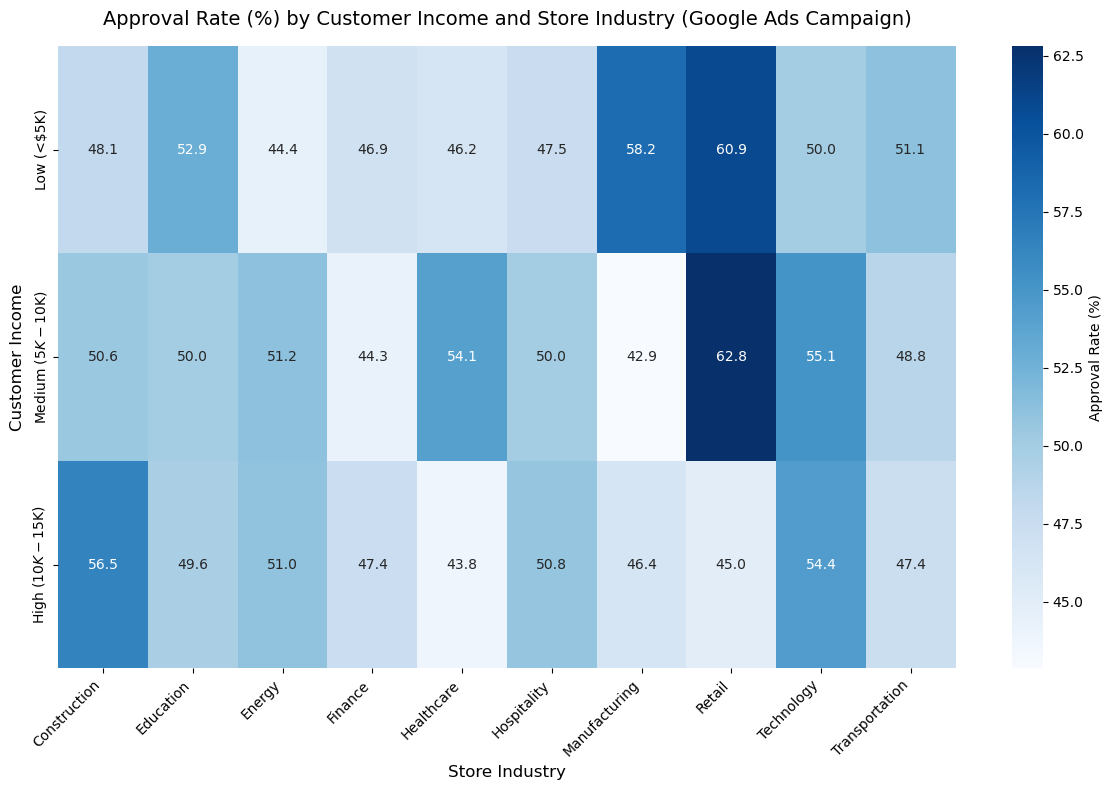

           income_bin        industry                 name  approval_rate  \
0          Low (<$5K)    Construction  Affiliate Marketing       0.490909   
1          Low (<$5K)    Construction    Content Marketing       0.586207   
2          Low (<$5K)    Construction          Direct Mail       0.442623   
3          Low (<$5K)    Construction      Email Marketing       0.468750   
4          Low (<$5K)    Construction         Facebook Ads       0.423729   
..                ...             ...                  ...            ...   
445  High ($10K-$15K)  Transportation   Referral Marketing       0.532847   
446  High ($10K-$15K)  Transportation                  SEO       0.422764   
447  High ($10K-$15K)  Transportation               TV Ads       0.492647   
448  High ($10K-$15K)  Transportation          Trade Shows       0.578512   
449  High ($10K-$15K)  Transportation          Twitter Ads       0.455285   

     application_count  
0                   55  
1                   58  


In [7]:
"""

Task 5

1) Analyze the relationship between customer income levels and application approval rates across
store industries, with a focus on how marketing campaigns influence approvals.


"""


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the Excel file
file_path = '/Users/parvathypillai/Desktop/SnapFinance/Assessment/sample_datasets.xlsx'
customers = pd.read_excel(file_path, sheet_name='customers')
applications = pd.read_excel(file_path, sheet_name='applications')
stores = pd.read_excel(file_path, sheet_name='stores')
marketing = pd.read_excel(file_path, sheet_name='marketing')

# Merge customers, applications, stores, and marketing
cust_app = customers.merge(applications, on='customer_id', how='inner')
cust_app_store = cust_app.merge(stores, on='store', how='left')
data = cust_app_store.merge(marketing, left_on='campaign', right_on='id', how='left')

# Bin income into categories
data['income_bin'] = pd.cut(data['income'], bins=[0, 5000, 10000, 15000, float('inf')], labels=['Low (<$5K)', 'Medium ($5K-$10K)', 'High ($10K-$15K)', 'Very High (>$15K)'])

# Calculate approval rate by income bin, store industry, and marketing campaign
approval_analysis = data.groupby(['income_bin', 'industry', 'name']).agg(
    approval_rate=('approved', 'mean'),
    application_count=('application_id', 'count')
).reset_index()

# Filter for industries and campaigns with sufficient data (e.g., >= 10 applications)
approval_analysis = approval_analysis[approval_analysis['application_count'] >= 10]

# Pivot table for heatmap (approval rate by income bin and industry, for a specific campaign)
# Focus on 'Google Ads' as an example (can be adjusted for other campaigns)
pivot_data = approval_analysis[approval_analysis['name'] == 'Google Ads'].pivot_table(
    values='approval_rate',
    index='income_bin',
    columns='industry',
    aggfunc='mean'
)

# Convert approval rate to percentage
pivot_data = pivot_data * 100

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    pivot_data,
    annot=True,
    fmt='.1f',
    cmap='Blues',
    cbar_kws={'label': 'Approval Rate (%)'},
    annot_kws={'size': 10}
)
plt.title('Approval Rate (%) by Customer Income and Store Industry (Google Ads Campaign)', fontsize=14, pad=15)
plt.xlabel('Store Industry', fontsize=12)
plt.ylabel('Customer Income', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

# Print summary table for reference
print(approval_analysis[['income_bin', 'industry', 'name', 'approval_rate', 'application_count']])

/var/folders/4z/3f0tm5656g1dgl1xr91k3n040000gn/T/ipykernel_16597/4016299582.py:28: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Unnamed: 0_x'} in the result is deprecated and will raise a MergeError in a future version.
  data = cust_app_store.merge(marketing, left_on='campaign', right_on='id', how='left')


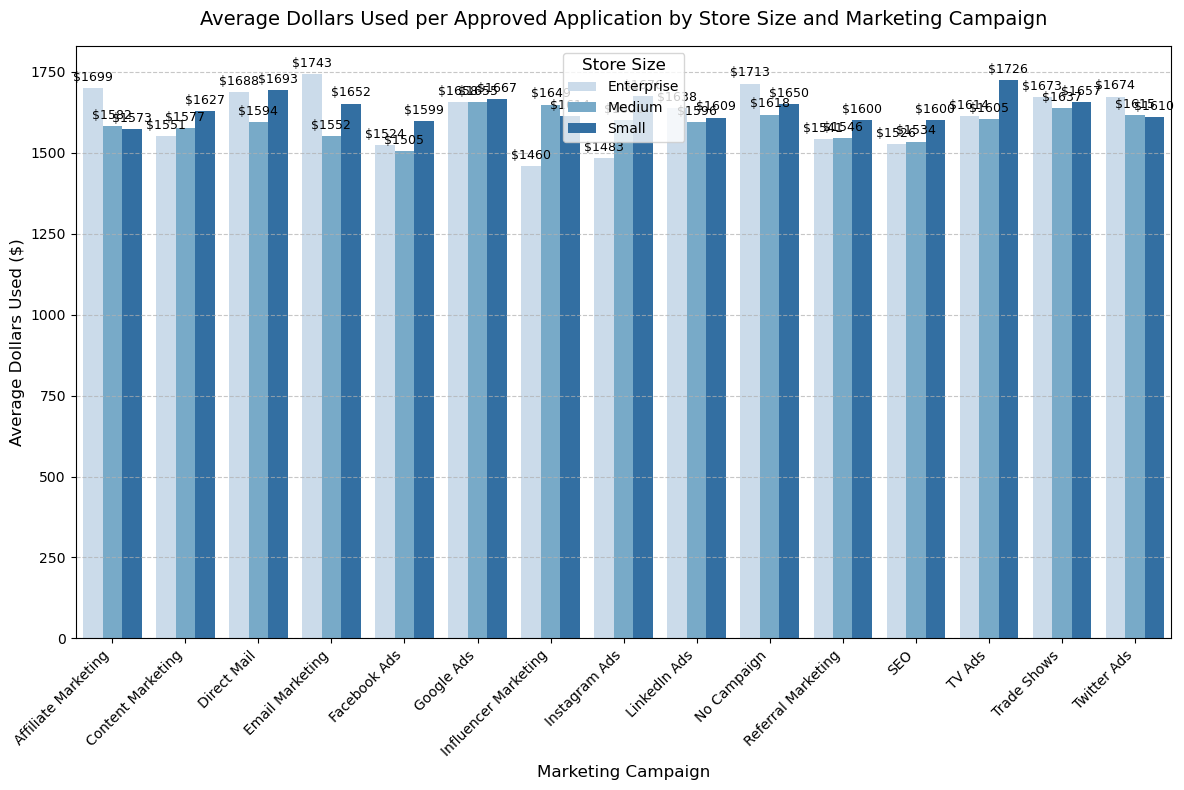

          size                  name  avg_dollars_used  application_count
0   Enterprise   Affiliate Marketing       1698.820225                 89
1   Enterprise     Content Marketing       1551.338235                 68
2   Enterprise           Direct Mail       1688.431818                 88
3   Enterprise       Email Marketing       1743.094595                 74
4   Enterprise          Facebook Ads       1523.671053                 76
5   Enterprise            Google Ads       1657.790698                 86
6   Enterprise  Influencer Marketing       1459.848101                 79
7   Enterprise         Instagram Ads       1482.987013                 77
8   Enterprise          LinkedIn Ads       1637.890244                 82
9   Enterprise           No Campaign       1713.434426                610
10  Enterprise    Referral Marketing       1540.986667                 75
11  Enterprise                   SEO       1525.779412                 68
12  Enterprise                TV Ads  

In [8]:
"""

Task 5

2) Investigate the relationship between store size (size from the stores table) and the average dollars_used
per approved application, segmented by marketing campaign (name from the marketing table). This analysis
reveals how store scale (Small, Medium, Enterprise) impacts customer spending behavior under different 
marketing influences, helping stakeholders optimize partnerships and campaign targeting.


"""

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the Excel file
file_path = '/Users/parvathypillai/Desktop/SnapFinance/Assessment/sample_datasets.xlsx'
customers = pd.read_excel(file_path, sheet_name='customers')
applications = pd.read_excel(file_path, sheet_name='applications')
stores = pd.read_excel(file_path, sheet_name='stores')
marketing = pd.read_excel(file_path, sheet_name='marketing')

# Merge customers, applications, stores, and marketing
cust_app = customers.merge(applications, on='customer_id', how='inner')
cust_app_store = cust_app.merge(stores, on='store', how='left')
data = cust_app_store.merge(marketing, left_on='campaign', right_on='id', how='left')

# Filter for approved applications with non-zero dollars used
data = data[(data['approved'] == True) & (data['dollars_used'] > 0)]

# Calculate average dollars used by store size and marketing campaign
usage_analysis = data.groupby(['size', 'name']).agg(
    avg_dollars_used=('dollars_used', 'mean'),
    application_count=('application_id', 'count')
).reset_index()

# Filter for groups with sufficient data (e.g., >= 10 applications)
usage_analysis = usage_analysis[usage_analysis['application_count'] >= 10]

# Plot grouped bar plot
plt.figure(figsize=(12, 8))
sns.barplot(
    data=usage_analysis,
    x='name',
    y='avg_dollars_used',
    hue='size',
    palette='Blues'
)

# Customize plot
plt.title('Average Dollars Used per Approved Application by Store Size and Marketing Campaign', fontsize=14, pad=15)
plt.xlabel('Marketing Campaign', fontsize=12)
plt.ylabel('Average Dollars Used ($)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.legend(title='Store Size', fontsize=10, title_fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Add value labels on bars
for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='$%.0f', fontsize=9, padding=3)

plt.tight_layout()
plt.show()

# Print summary table for reference
print(usage_analysis[['size', 'name', 'avg_dollars_used', 'application_count']])

In [9]:
# end of assessment